In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
#SET PATH TO THE DIRECTORY IN WHICH YOUR DATASET IS RESIDING
path=""

In [3]:
#READ TEST DATASET
test_name=path+"test.csv"
test=pd.read_csv(test_name)
test_shape=test.shape
print(test_shape)

(418, 11)


In [4]:
#READ TRAIN DATASET
train_name=path+"train.csv"
train=pd.read_csv(train_name)
train_shape=train.shape
print(train_shape)

(891, 12)


In [5]:
#Exploring train data
def show_data(data,num_of_rows):
    print(data.head(num_of_rows))

In [6]:
def show_pivot(data,indexes,value):
    pivot=data.pivot_table(index=indexes,values=value)
    print(pivot)

In [7]:
def plot_pivot(data,indexes,value):
    pivot=data.pivot_table(index=indexes,values=value)
    pivot.plot.bar()
    plt.show()

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


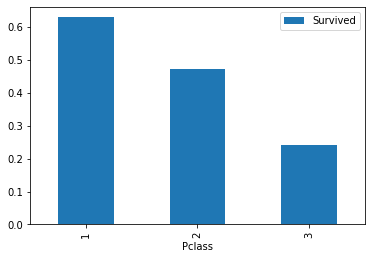

In [8]:
index=["Pclass"]
show_pivot(train,index,"Survived")
plot_pivot(train,index,"Survived")

In [9]:
def process_column(data,column,new_column,change_na,cut_point,label_name):
    data[column]=data[column].fillna(change_na)
    data[new_column]=pd.cut(data[column],cut_point,labels=label_name)
    return data

In [10]:
def get_dummies(data,column):
    for c in column:
        dummies=pd.get_dummies(data[c],prefix=c)
        data=pd.concat([data,dummies],axis=1)
    return data

In [11]:
#PROCESSING AGE DATA
column="Age"
new_column="Age Categories"
change_na=-0.5
cut_point=[-1,0,5,12,18,35,60,100]
label_name=["Missing","Infant","Child","Teenage","Young Adult","Adult","Senior"]
train=process_column(train,column,new_column,change_na,cut_point,label_name)
test=process_column(test,column,new_column,change_na,cut_point,label_name)

In [12]:
column=["Pclass","Sex","Age Categories"]
train=get_dummies(train,column)
test=get_dummies(test,column)

In [13]:
variables=["Pclass_1","Pclass_2","Pclass_3","Age Categories_Missing","Age Categories_Infant","Age Categories_Child",
        "Age Categories_Teenage","Age Categories_Young Adult","Age Categories_Adult","Age Categories_Senior",
        "Sex_male","Sex_female"]
values="Survived"

In [14]:
show_data(train,2)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare  ... Pclass_3 Sex_female Sex_male  \
0      0  A/5 21171   7.2500  ...        1          0        1   
1      0   PC 17599  71.2833  ...        0          1        0   

   Age Categories_Missing  Age Categories_Infant  Age Categories_Child  \
0                       0                      0                     0   
1                       0                      0                     0   

   Age Categories_Teenage  Age Categories_Young Adult  Age Categories_Adult  \
0                       0                           1                     0   
1                       0                           0                     1   


In [15]:
def get_trained_model(model,X,Y,test_size):
    train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=test_size,random_state=0)
    model.fit(train_X,train_Y)
    accuracy = get_accuracy(model,test_X,test_Y)
    print("Training Accuracy of this model on is:",accuracy)
    return model

In [16]:
def get_accuracy(model,X,Y):
    predictions=model.predict(X)
    accuracy = accuracy_score(Y, predictions)
    return accuracy

In [17]:
train_X=train[variables]
train_Y=train[values]

genderdata=pd.read_csv(path+"gender_submission.csv")
test_X=test[variables]
test_Y=genderdata[values]

In [18]:
lr=LogisticRegression()
lr=get_trained_model(lr,train_X,train_Y,0.2)
lr_accuracy=get_accuracy(lr,test_X,test_Y)
print("Test Accuracy of Logistic Regression is:",lr_accuracy)

Training Accuracy of this model on is: 0.8100558659217877
Test Accuracy of Logistic Regression is: 0.9784688995215312


In [19]:
#Using Neura
clf = MLPClassifier(solver='sgd', alpha=1e-6,hidden_layer_sizes=(1, 2), random_state=1)
clf=get_trained_model(clf,train_X,train_Y,0.1)
clf_accuracy=get_accuracy(clf,test_X,test_Y)
print("Test Accuracy of Neural Netowrk is:",clf_accuracy)

Training Accuracy of this model on is: 0.5666666666666667
Test Accuracy of Neural Netowrk is: 0.6363636363636364
